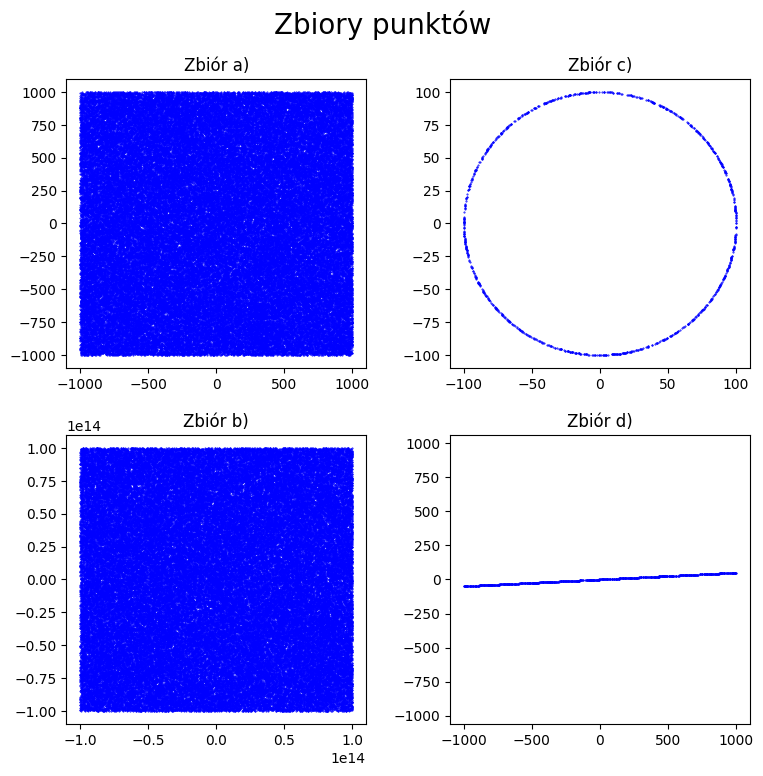

Generating data took: 0.005s.


In [75]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import math
import time

np.random.seed(2)
matplotlib.rcParams['figure.figsize'] = [8, 8]

data = []
generation_start = time.time()
# generating 1a
data.append(np.random.uniform(-1000, 1000, [10**5, 2]))

# generating 1b
data.append(np.random.uniform(-10**14, 10**14, [10**5, 2]))

# generating 1c
data.append(np.array([[100*math.sin(angle),  100*math.cos(angle)]
                      for angle in np.random.uniform(0, 2*math.pi, 1000)]))

# generating 1d
a, b = [-1, 0], [1, 0.1]
m = (a[1] - b[1]) / (a[0] - b[0])
u = a[1] - m * a[0]

data.append(np.array([[x, x*m + u] for x in np.random.uniform(-1000, 1000, 1000)]))
generation_stop = time.time()

# Plotting  data
figure, axis = plt.subplots(2, 2)
plt.axis("equal")
for i, data_set in enumerate(data):
    axis[i%2, i//2].scatter(*zip(*data_set), color="blue", s=0.2)

figure.suptitle('Zbiory punktów', fontsize=20)
figure.tight_layout(pad=2)
axis[0, 0].set_title("Zbiór a)")
axis[0, 1].set_title("Zbiór c)")
axis[1, 0].set_title("Zbiór b)")
axis[1, 1].set_title("Zbiór d)")


# save plot
# plt.savefig('images/sets_vis.png', dpi=500)
plt.show()
print(f"Generating data took: {generation_stop - generation_start :.3f}s.")

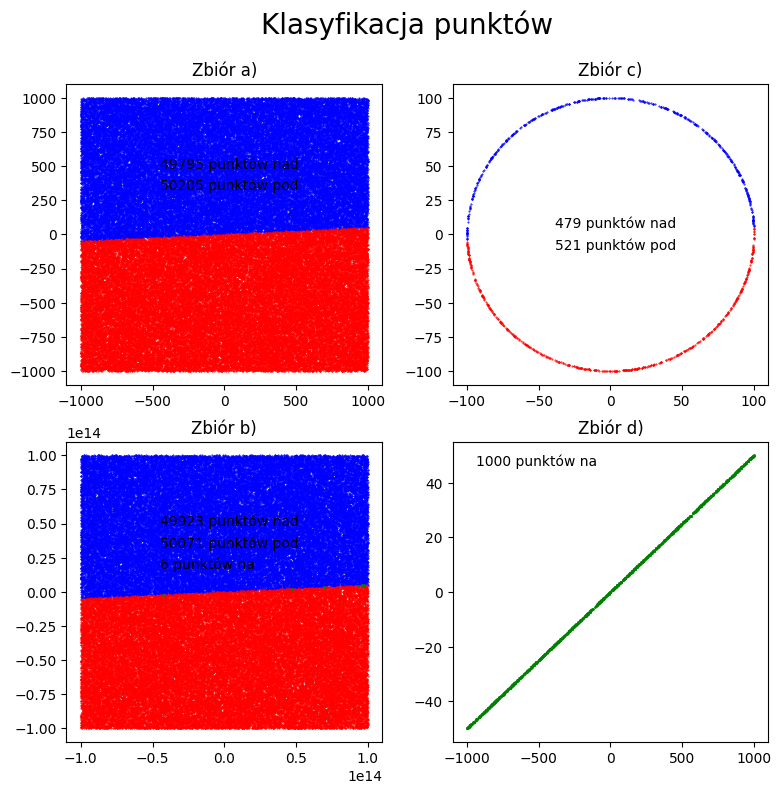

In [76]:
%matplotlib inline

# dividing sets of points in respect to line a, b
from ctypes.wintypes import POINT
import time

eps = 10**(-8)

def numpy2x2(set, a, b):
    return np.linalg.det(np.dstack((np.tile(a, (len(set), 1)) - set, np.tile(b, (len(set), 1)) - set)))

def numpy3x3(set, a, b):
    vec3_a = np.array(a + [1])
    vec3_b = np.array(b + [1])
    one = np.array([1])

    return np.linalg.det(np.dstack((np.tile(vec3_a, (len(set), 1)),
                                    np.tile(vec3_b, (len(set), 1)),
                                    np.hstack((set, np.tile(one, (len(set), 1)))))))

def my2x2(set, a, b):
    det_array = [0 for _ in range(len(set))]

    for i, point in enumerate(set):
        det_array[i] = (a[0] - point[0])*(b[1] - point[1]) - (b[0] - point[0])*(a[1] - point[1])

    return det_array

def my3x3(set, a, b):
    det_array = [0 for _ in range(len(set))]

    for i, point in enumerate(set):
        det_array[i] = a[0]*b[1] + a[1]*point[0] + b[0]*point[1] - (b[1]*point[0] + a[0]*point[1] + a[1]*b[0])
    
    return det_array


matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams['legend.handlelength'] = 0
figure, axis = plt.subplots(2, 2)
figure.suptitle('Klasyfikacja punktów', fontsize=20)
figure.tight_layout(pad=2)


det_data = []

# 2x2 det numpy
for point_set in data:
    det_data.append(numpy2x2(point_set, a, b))

# plotting function
for i, point_set in enumerate(data):
    points_above = []
    points_on = []
    points_below = []
    
    for j, point in enumerate(point_set):
        if abs(det_data[i][j]) <= eps:
            points_on.append(point)
        elif det_data[i][j] < 0:
            points_below.append(point)
        else:
            points_above.append(point)
    
    # handling labels
    handle_labels = []
    if len(points_above) > 0:
        axis[i % 2, i // 2].scatter(*zip(*points_above), color="blue", s=0.2)
        blue = mpatches.Patch(alpha = 0, label=f"{len(points_above)} punktów nad")
        handle_labels.append(blue)
    if len(points_below) > 0:         
        axis[i % 2, i // 2].scatter(*zip(*points_below), color="red", s=0.2)
        red = mpatches.Patch(alpha = 0, label=f"{len(points_below)} punktów pod")
        handle_labels.append(red)
    if len(points_on) > 0:
        axis[i % 2, i // 2].scatter(*zip(*points_on), color="green", s=1)
        green = mpatches.Patch(alpha = 0, label=f"{len(points_on)} punktów na")
        handle_labels.append(green)

    # handling legends
    if i == 0 or i == 1:
        axis[i % 2, i // 2].legend(handles=handle_labels, loc=9, frameon=False, bbox_to_anchor=(0.5, 0.8))
    if i == 2:
        axis[0, 1].legend(handles=handle_labels, loc=10, frameon=False)
    if i == 3:
        axis[1, 1].legend(handles=handle_labels, loc="upper left", frameon=False)



axis[0, 0].set_title("Zbiór a)")
axis[0, 1].set_title("Zbiór c)")
axis[1, 0].set_title("Zbiór b)")
axis[1, 1].set_title("Zbiór d)")

# save plot
# plt.savefig('images/line.png', dpi=500)
plt.show()
        
    

In [77]:
# checking different eps values
eps_tab = [10**(-2), 10**(-5), 10**(-8), 10**(-11), 10**(-14)]
set_names = ["A", "B", "C", "D"]

for i, name in enumerate(set_names):
    print("SET: ", name, 20*"-")

    det_data = []
    
    det_data.append(numpy2x2(data[i], a, b))
    det_data.append(numpy3x3(data[i], a, b))
    det_data.append(my2x2(data[i], a, b))
    det_data.append(my3x3(data[i], a, b))


    for eps in eps_tab:
        print("epsilon == ", eps)

        for j, det_arr in enumerate(det_data):
            points_above_count = points_on_count = points_below_count = 0

            for det_val in det_arr:
                if abs(det_val) <= eps:
                    points_on_count += 1
                elif det_val < 0:
                    points_below_count += 1
                else:
                    points_above_count += 1
            
            if j == 0:
                print("NUMPY 2x2", points_above_count, points_on_count, points_below_count, sep="\\\\")
            
            if j == 1:
                print("NUMPY 3x3", points_above_count, points_on_count, points_below_count, sep="\\\\")

            if j == 2:
                print("MY 2x2", points_above_count, points_on_count, points_below_count, sep="\\\\")

            if j == 3:
                print("MY 3x3", points_above_count, points_on_count, points_below_count, sep="\\\\")



SET:  A --------------------
epsilon ==  0.01
NUMPY 2x2\\49795\\1\\50204
NUMPY 3x3\\49795\\1\\50204
MY 2x2\\49795\\1\\50204
MY 3x3\\49795\\1\\50204
epsilon ==  1e-05
NUMPY 2x2\\49795\\0\\50205
NUMPY 3x3\\49795\\0\\50205
MY 2x2\\49795\\0\\50205
MY 3x3\\49795\\0\\50205
epsilon ==  1e-08
NUMPY 2x2\\49795\\0\\50205
NUMPY 3x3\\49795\\0\\50205
MY 2x2\\49795\\0\\50205
MY 3x3\\49795\\0\\50205
epsilon ==  1e-11
NUMPY 2x2\\49795\\0\\50205
NUMPY 3x3\\49795\\0\\50205
MY 2x2\\49795\\0\\50205
MY 3x3\\49795\\0\\50205
epsilon ==  1e-14
NUMPY 2x2\\49795\\0\\50205
NUMPY 3x3\\49795\\0\\50205
MY 2x2\\49795\\0\\50205
MY 3x3\\49795\\0\\50205
SET:  B --------------------
epsilon ==  0.01
NUMPY 2x2\\49923\\6\\50071
NUMPY 3x3\\49924\\0\\50076
MY 2x2\\49920\\7\\50073
MY 3x3\\49924\\0\\50076
epsilon ==  1e-05
NUMPY 2x2\\49923\\6\\50071
NUMPY 3x3\\49924\\0\\50076
MY 2x2\\49920\\7\\50073
MY 3x3\\49924\\0\\50076
epsilon ==  1e-08
NUMPY 2x2\\49923\\6\\50071
NUMPY 3x3\\49924\\0\\50076
MY 2x2\\49920\\7\\50073
MY 3x3\\